# **Table of Contents**

* **Data loading and Data Preparation**
* **Exploratory analysis & visualization**
* **Asking and answering questions**
    1.     Top 10 bestselling books from 2009 to 2019 (fiction/non-fiction)
    1.     Top 10 bestselling authors from 2009 to 2019 (fiction/non-fiction)
    1.     Year-wise percentage category distribution of books
    1.     How many unique books and authors were included in bestsellers list from 2009 to 2019?
    1.     Most expensive book and most affordable book
    1.     Highest rated and lowest rated books
    1.     Does the Title length of the book matter to be a bestseller?
* **Summary and Conclusion**

In [1]:
#importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Configuring styles
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#E6E6E6'

## 1. Data Loading and Data Preparation

In [2]:
df = pd.read_csv('/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


* Dataset contains **550 rows and 7 columns**

* There are **no missing values** in the dataset

In [4]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


* We see **minimum price is 0** and **maximum price is 105**.

* Year ranges from **2009 to 2019**

* **Average rating is 4.6** for bestselling books from 2009 to 2019 

* **87841 is highest no of reviews** and **37 is lowest no of reviews** recieved for any book

## 2. Exploratory analysis & visualization

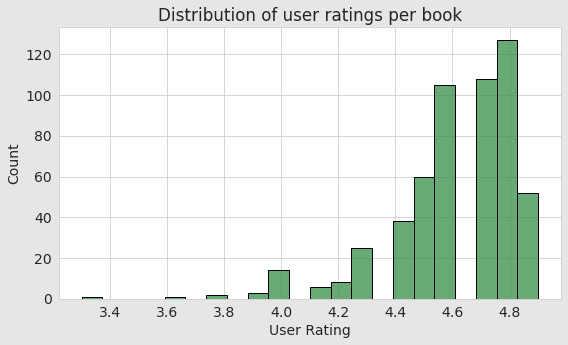

In [5]:
sns.set_palette("PRGn_r")
plt.title("Distribution of user ratings per book")
sns.histplot(df['User Rating'],edgecolor='black');

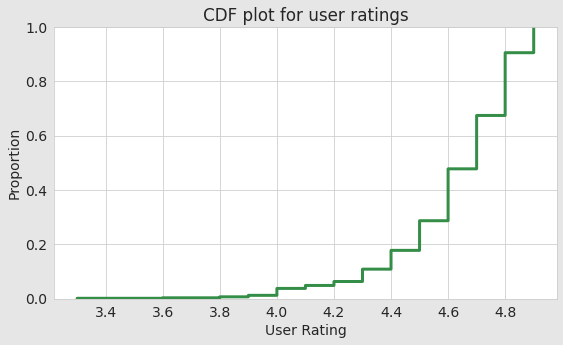

In [6]:
plt.title("CDF plot for user ratings")
sns.ecdfplot(df['User Rating'],linewidth=3);

* **70% user ratings were above 4.5**


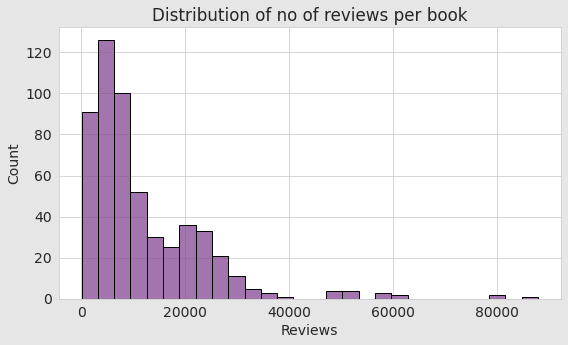

In [7]:
sns.set_palette("PRGn")
plt.title("Distribution of no of reviews per book")
sns.histplot(df['Reviews'],edgecolor='black');

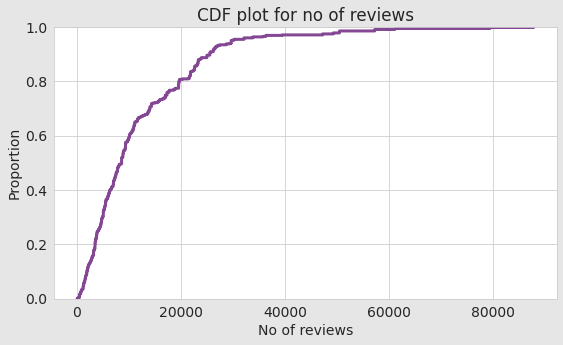

In [8]:
plt.xlabel("No of reviews")
plt.title("CDF plot for no of reviews")
sns.ecdfplot(df.Reviews,linewidth=3);

* **80% of the books had less than 20K reviews**

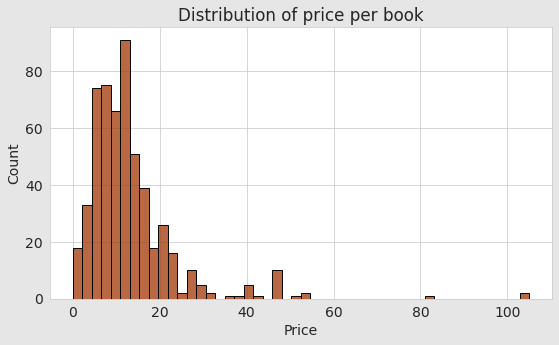

In [9]:
sns.set_palette("YlOrBr_r")
plt.title("Distribution of price per book")
sns.histplot(df['Price'],edgecolor='black');

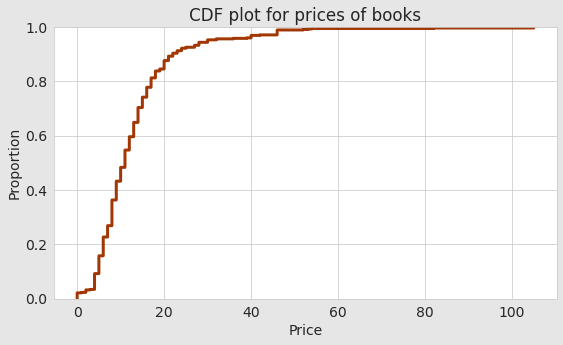

In [10]:
plt.title("CDF plot for prices of books")
sns.ecdfplot(df.Price,linewidth=3);

* **85% of books were priced  less than 20($)**

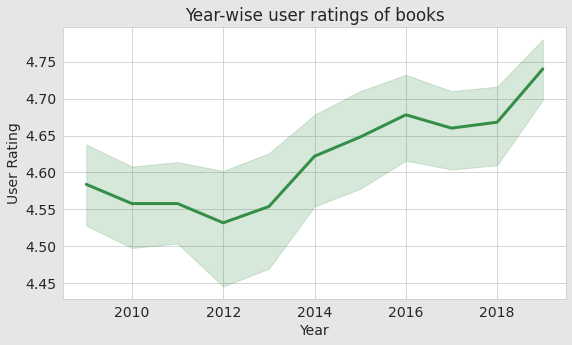

In [11]:
sns.set_palette("PRGn_r")
plt.title("Year-wise user ratings of books")
sns.lineplot(y="User Rating", x="Year", data=df,linewidth=3);

* **User ratings for the bestselling books have slightly improved over a period of time**

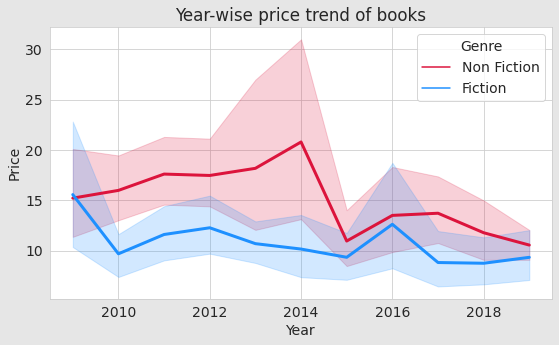

In [12]:
custom_palette = ['crimson',"dodgerblue"]
sns.set_palette(custom_palette)
plt.title("Year-wise price trend of books")
sns.lineplot(y="Price", x="Year",hue="Genre", data=df,linewidth=3);

* **Non-fiction books were always costly than fiction books to purchase except in year 2009**

* **Overall price of the books is decreasing over time**

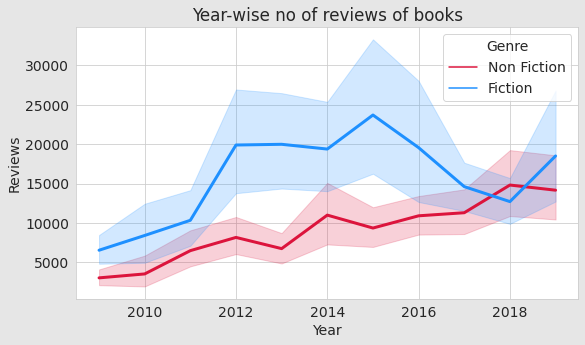

In [13]:
custom_palette = ['crimson',"dodgerblue"]
sns.set_palette(custom_palette)
plt.title("Year-wise no of reviews of books")
sns.lineplot(y="Reviews", x="Year", hue="Genre" ,data=df,linewidth=3);

* **Fiction readers often like to post reviews than the non fiction readers**

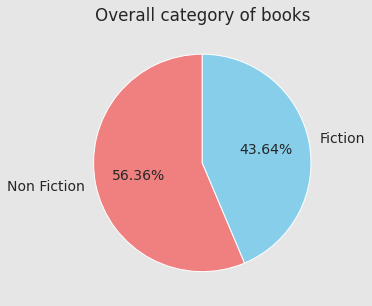

In [14]:
custom_palette = ['lightcoral',"skyblue"]
sns.set_palette(custom_palette)
genre = df.Genre.value_counts()
plt.title("Overall category of books")
plt.pie(genre, labels=genre.index, autopct='%0.2f%%', startangle=90);

* **On an average over 50 bestselling books, 28 were non-fiction and 22 were fiction**

## 3. Asking and answering questions

### 1. Top 10 bestselling books from 2009 to 2019 (fiction/non-fiction)

In [15]:
nonfict = df[df['Genre']=='Non Fiction']
fict = df[df['Genre']=='Fiction']
top10fict = fict['Name'].value_counts().head(10)
top10nonfict = nonfict['Name'].value_counts().head(10)

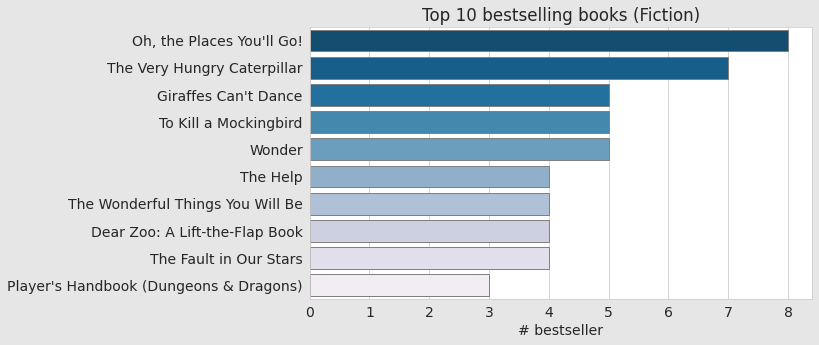

In [16]:
sns.barplot(x=top10fict,y=top10fict.index, palette = 'PuBu_r',edgecolor='grey');
plt.title("Top 10 bestselling books (Fiction)")
plt.xlabel('# bestseller');

* **"Oh, the Places You'll Go!" was the top selling fiction book with 8 apperences in the best-selling books from 2009 to 2019.**

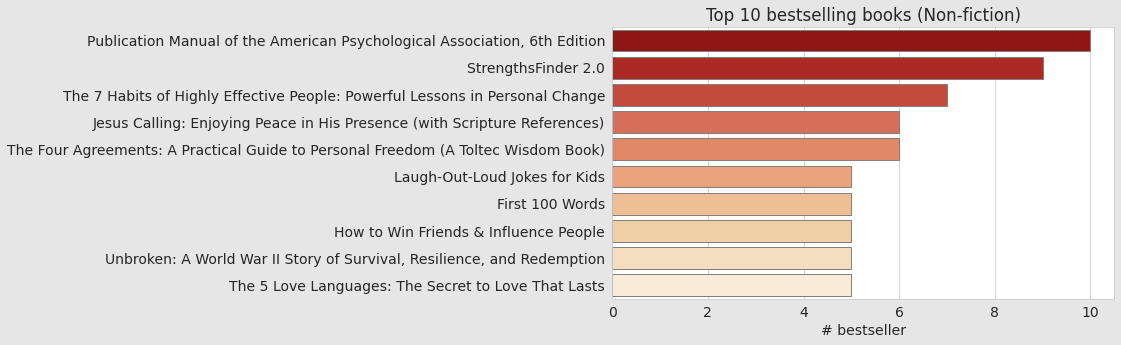

In [17]:
sns.barplot(x=top10nonfict,y=top10nonfict.index, palette = 'OrRd_r',edgecolor='grey');
plt.title("Top 10 bestselling books (Non-fiction)")
plt.xlabel('# bestseller');

* **"Publication Manual of the American Psychological Association, 6th Edition" was the top selling non-fiction book 
with 10 apperences in the best-selling books from 2009 to 2019.**

### 2. Top 10 bestselling authors from 2009 to 2019 (fiction/non-fiction)

In [18]:
top10fict_auth = fict['Author'].value_counts().head(10)
top10nonfict_auth = nonfict['Author'].value_counts().head(10)

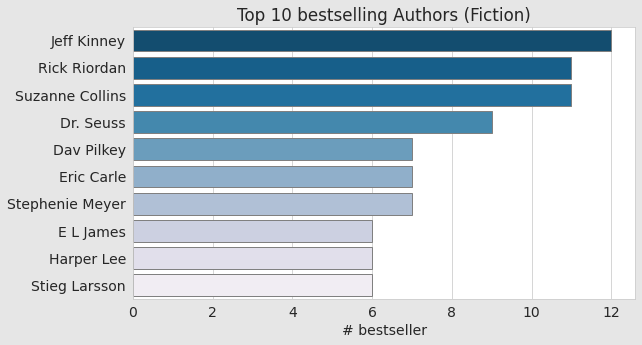

In [19]:
sns.barplot(x=top10fict_auth,y=top10fict_auth.index, palette = 'PuBu_r',edgecolor='grey');
plt.title("Top 10 bestselling Authors (Fiction)")
plt.xlabel('# bestseller');

* **"Jeff Kinney" was the top selling author under fiction category with 12 apperences in the best-selling books from 2009 to 2019.**

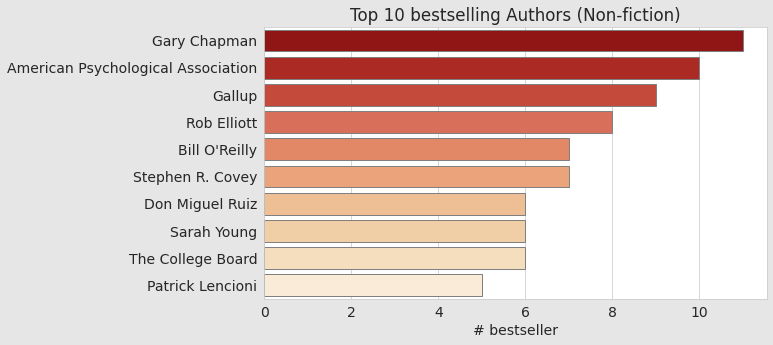

In [20]:
sns.barplot(x=top10nonfict_auth,y=top10nonfict_auth.index, palette = 'OrRd_r',edgecolor='grey');
plt.title("Top 10 bestselling Authors (Non-fiction)")
plt.xlabel('# bestseller');

* **"Gary Chapman" was the top selling author under non-fiction category with 11 apperences in the best-selling books from 2009 to 2019.**

### 3. Year-wise percentage category distribution of books

In [21]:
temp1 = df.groupby(['Year','Genre'])[['Genre']].count()
temp1.rename(columns={"Genre":'Count'},inplace=True)
temp1.reset_index(inplace= True)

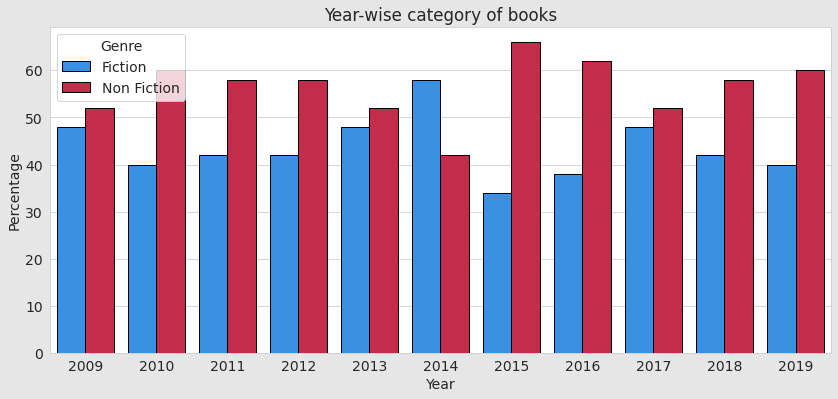

In [22]:
custom_palette = ["dodgerblue",'crimson']
sns.set_palette(custom_palette)
plt.figure(figsize=(14,6))
plt.title("Year-wise category of books")
sns.barplot(x=temp1.Year, y=temp1.Count * 100 / 50, hue=temp1.Genre,edgecolor='black');
plt.ylabel("Percentage");

* **There was always a high proportion of non-fiction category books in top 50 best-selling books from year 2009 to 2019, except for the year 2014**

### 4. How many unique books and authors were included in bestsellers list from 2009 to 2019? 

In [23]:
uniquebook = df.Name.unique().shape[0]
uniqueauth = df.Author.unique().shape[0]
print(uniquebook,550-uniquebook)
print(uniqueauth)

351 199
248


* **Out of 550 bestselling books, 351 books were unique which also means 199 books were repeated**
* **248 unique authors were included in the list of bestselling authors from the year 2009 to 2019**

### 5. Most expensive book and most affordable book 

In [24]:
temp2 = df[df.Price == df.Price.max()]
exp=temp2.drop_duplicates(subset=['Name'], keep='first')
exp[['Name','Author','Price']]

,Name,Author,Price
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,105


In [25]:
exp.Name.tolist()

['Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5']

* **"Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5" was the most expensive book priced at 105($)**

In [26]:
temp3 = df[df.Price == df.Price.min()]
cheap = temp3.drop_duplicates(subset=['Name'], keep='first')
cheap[['Name','Author','Price']]

,Name,Author,Price
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,0
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,0
116,Frozen (Little Golden Book),RH Disney,0
193,JOURNEY TO THE ICE P,RH Disney,0
219,Little Blue Truck,Alice Schertle,0
358,The Constitution of the United States,Delegates of the Constitutional,0
381,The Getaway,Jeff Kinney,0
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,0
505,To Kill a Mockingbird,Harper Lee,0


In [27]:
len(cheap.Name.tolist())

9

* **There were total 9 books priced at 0($)**

### 6. Highest rated and lowest rated books

In [28]:
temp4 = df[df['User Rating'] == df['User Rating'].max()]
highrated = temp4.drop_duplicates(subset=['Name'], keep='first')
highrated[['Name','Author','User Rating']]

,Name,Author,User Rating
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9


In [29]:
len(highrated.Name.tolist())

28

* **There were total 28 books which had recieved the highest rating of 4.9**

In [30]:
temp5 = df[df['User Rating'] == df['User Rating'].min()]
lowrated = temp5.drop_duplicates(subset=['Name'], keep='first')
lowrated[['Name','Author','User Rating']]

,Name,Author,User Rating
353,The Casual Vacancy,J.K. Rowling,3.3


* **"The Casual Vacancy" written by J.K.Rowling recieved the lowest rating of 3.3**

### 7. Does the Title length of the book matter to be a bestselling book?

In [31]:
name = df.Name.tolist()
name_len = []
for i in name:
    name_len.append(len(i))

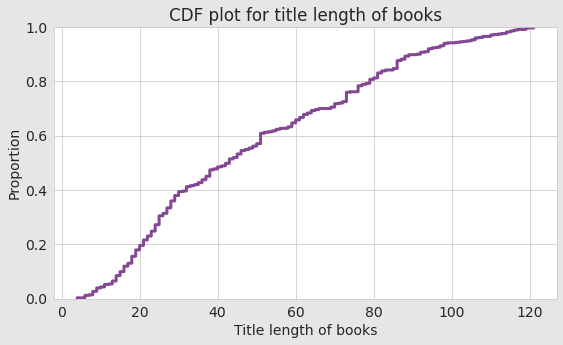

In [32]:
sns.set_palette("PRGn")
sns.ecdfplot(data=name_len, linewidth=3);
plt.xlabel('Title length of books');
plt.title('CDF plot for title length of books');

**There is 40% chance that your book will be a bestseller if title length of your book is less than 30 characters.**

## 4. Summary and Conclusion

#### Here is a summary of all the inferences drawn from the analysis

* **Average rating for bestselling books from 2009 to 2019 is 4.6**

* **85% of the books were priced less than 20 dollars**

* **There is a slight improvement in user ratings of the bestselling books over a period of time.**

* **Non-fiction books were always costly than fiction books except in year 2009**

* **Fiction readers often like to post reviews than the non fiction readers**

* **On an average over 50 bestselling books, 28 were non-fiction and 22 were fiction**

* **"Oh, the Places You'll Go!" is the top selling fiction book with 8 apperences**

* **"Publication Manual of the American Psychological Association, 6th Edition" is the top selling non-fiction book with 10 apperences**

* **"Jeff Kinney" is the top selling author under fiction category with 12 apperences**

* **"Gary Chapman" is the top selling author under non-fiction category with 11 apperences**

* **Out of 550 bestselling books, 351 books were unique which also means 199 books were repeated**

* **248 unique authors were included in the list of bestselling authors from the year 2009 to 2019**

* **"Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5" was the most expensive book priced at 105($)**

* **There were total 9 books priced at 0($) i.e they were free of cost**

* **There were total 28 books which had recieved the highest rating of 4.9**

* **"The Casual Vacancy" written by J.K.Rowling recieved the lowest rating of 3.3**

* **There is 40% chance that your book will be a bestseller if title length of your book is less than 30 characters.**